In [13]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

# df = pd.read_csv('../temp/day_1008.csv')
df = pd.read_csv('../temp/brich_all.csv')
df.head()

,ds,y
0,2018-01-01,37928490.0
1,2018-01-02,35546420.0
2,2018-01-03,27969820.0
3,2018-01-04,23312980.0
4,2018-01-05,16531990.0


In [14]:
df['cap'] = 150000000
df['floor'] = 0

#changepoint_prior_scale 유연성 디폴트 0.05
#changepoint_range 트랜드체크포인트 범위 디폴트 0.8
#interval_width yhat의 불확실성 범위 기본 0.8
#mcmc_samples Bayesian Sampling진행 기본 0
m = Prophet(mcmc_samples=300,changepoint_range=0.95, changepoint_prior_scale=0.5, interval_width=0.9, yearly_seasonality=True, daily_seasonality=True, growth='logistic')
m.fit(df, control={'max_treedepth': 12})

future = m.make_future_dataframe(periods=600)
future.tail()

future['cap'] = 150000000
future['floor'] = 0



In [15]:
forecast = m.predict(future)
forecast.tail()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1241,2021-05-26,9.199014e+07,-9.806176e+06,1.542617e+08
1242,2021-05-27,9.144414e+07,-8.178026e+06,1.546562e+08
1243,2021-05-28,8.733720e+07,-1.177716e+07,1.520209e+08
1244,2021-05-29,8.248970e+07,-1.508072e+07,1.449196e+08
1245,2021-05-30,8.841690e+07,-1.027470e+07,1.506792e+08


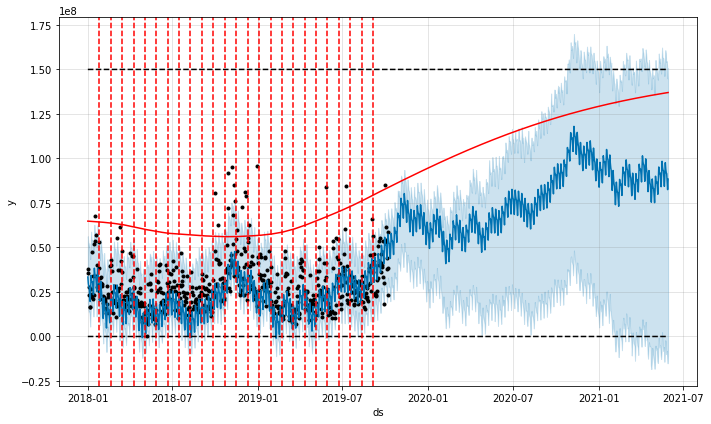

In [16]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)


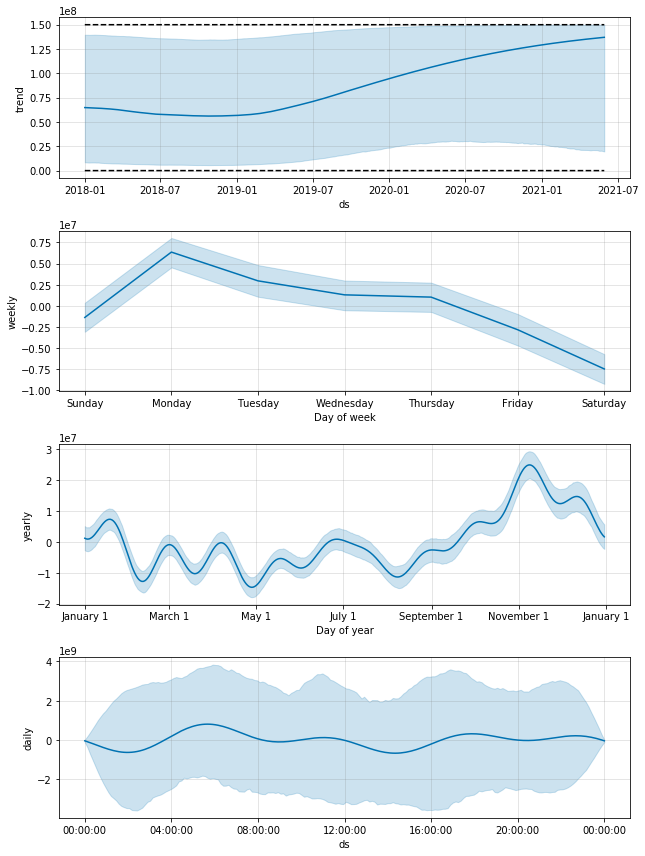

In [17]:
fig2 = m.plot_components(forecast)

In [12]:
forecast.to_csv("../temp/result_1008.csv", mode='a')